<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/introduccion/calculo_provsal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5> Cálculo de provisiones entre Saldo y definición de Pauta
</font></h1>

---



<center>
  <img src="https://www.sbs.gob.pe/portals/4/jer/lasbs-acciones-financiera/2015-07-16_121133.jpg" alt="HTML5 Icon" style="width: 300px; height: 350px;">
</center>



Las provisiones son un componente importante de la gestión de riesgos en la industria bancaria. Ayudan a los bancos a mantener un colchón financiero para hacer frente a pérdidas potenciales y a garantizar que sus estados financieros reflejen con precisión el riesgo asumido en sus operaciones.

En este laboratorio analizaremos las provisiones de una cartera de colocaciones.

In [1]:
#Importando ibrerías
import pandas as pd
import seaborn as sns

In [2]:
# data de análisis
pddf = pd.read_csv('cosechas_202101_sample.csv')
pddf.head()


,MES,MES_COSECHA,ID,MADURACION,ATRASO,MTOGASTOPROVISIONSOL,MTOPRINCIPALSOL,NUMENTIDADES_6
0,202101,202101.0,01039631,0.0,0.0,100.0000,10000.00839,3
1,202102,202101.0,01039631,1.0,0.0,-3.0213,9697.87432,2
2,202103,202101.0,01039631,2.0,0.0,-28.7398,6823.87667,2
3,202104,202101.0,01039631,3.0,0.0,-16.4854,5175.35207,2
4,202105,202101.0,01039631,4.0,0.0,-16.9565,3479.68702,2


In [6]:
pddf[pddf.ATRASO > 0].head()

,MES,MES_COSECHA,ID,MADURACION,ATRASO,MTOGASTOPROVISIONSOL,MTOPRINCIPALSOL,NUMENTIDADES_6
11,202106,202101.0,01056345,5.0,19.0,2875.9088,71897.80374,3
12,202107,202101.0,01056345,6.0,50.0,14379.5440,71897.77920,3
18,202103,202101.0,01065747,2.0,3.0,-125.3924,999162.01489,2
19,202104,202101.0,01065747,3.0,2.0,14668.1893,986391.10416,2
23,202108,202101.0,01065747,7.0,3.0,0.0000,986392.18400,1


In [3]:
pddf[pddf['ID'].astype('category') == '    01039631'].head(12)

,MES,MES_COSECHA,ID,MADURACION,ATRASO,MTOGASTOPROVISIONSOL,MTOPRINCIPALSOL,NUMENTIDADES_6
0,202101,202101.0,01039631,0.0,0.0,100.0000,10000.00839,3
1,202102,202101.0,01039631,1.0,0.0,-3.0213,9697.87432,2
2,202103,202101.0,01039631,2.0,0.0,-28.7398,6823.87667,2
3,202104,202101.0,01039631,3.0,0.0,-16.4854,5175.35207,2
4,202105,202101.0,01039631,4.0,0.0,-16.9565,3479.68702,2
5,202106,202101.0,01039631,5.0,0.0,52.4225,1744.39470,2


In [7]:
pddf[pddf['ID'].astype('category') == '    01056345'].head(12)

,MES,MES_COSECHA,ID,MADURACION,ATRASO,MTOGASTOPROVISIONSOL,MTOPRINCIPALSOL,NUMENTIDADES_6
6,202101,202101.0,01056345,0.0,0.0,742.6310,76696.29180,4
7,202102,202101.0,01056345,1.0,0.0,17.0296,76696.32405,4
8,202103,202101.0,01056345,2.0,0.0,7.3017,76696.29968,4
9,202104,202101.0,01056345,3.0,0.0,-41.6599,72530.17667,4
10,202105,202101.0,01056345,4.0,0.0,-6.3252,71897.67432,4
11,202106,202101.0,01056345,5.0,19.0,2875.9088,71897.80374,3
12,202107,202101.0,01056345,6.0,50.0,14379.5440,71897.77920,3


In [9]:
pddf[pddf.MADURACION == 0].groupby('MES_COSECHA').aggregate({'ID': 'count', 'MTOPRINCIPALSOL': 'sum'}).reset_index()

,MES_COSECHA,ID,MTOPRINCIPALSOL
0,202101.0,3581,3.756509e+08


In [11]:
375_650_900/3581

104901.11700642279

In [18]:
# Calculamos cuánto se gasto en provisiones en el mes de análisis
res = pddf.groupby('MADURACION').aggregate({'ID' : 'count',
                                            'MTOPRINCIPALSOL' : 'sum',
                                            'MTOGASTOPROVISIONSOL': 'sum'}).reset_index()
res.head(12)

,MADURACION,ID,MTOPRINCIPALSOL,MTOGASTOPROVISIONSOL
0,0.0,3581,3.756509e+08,3.762778e+06
1,1.0,3440,3.415429e+08,-1.567628e+05
2,2.0,3264,3.166428e+08,1.769423e+05
3,3.0,2474,2.972545e+08,4.340155e+04
4,4.0,2331,2.803917e+08,2.462782e+05
5,5.0,2243,2.631949e+08,4.611743e+05
6,6.0,2088,2.475120e+08,1.227129e+05
7,7.0,1992,2.294918e+08,1.021690e+05
8,8.0,1908,2.126132e+08,8.243197e+04
9,9.0,1841,1.988744e+08,3.741763e+04


In [19]:
res['PROVISON_ACUM'] = res['MTOGASTOPROVISIONSOL'].cumsum()
res.head(14)

,MADURACION,ID,MTOPRINCIPALSOL,MTOGASTOPROVISIONSOL,PROVISON_ACUM
0,0.0,3581,3.756509e+08,3.762778e+06,3.762778e+06
1,1.0,3440,3.415429e+08,-1.567628e+05,3.606015e+06
2,2.0,3264,3.166428e+08,1.769423e+05,3.782958e+06
3,3.0,2474,2.972545e+08,4.340155e+04,3.826359e+06
4,4.0,2331,2.803917e+08,2.462782e+05,4.072637e+06
5,5.0,2243,2.631949e+08,4.611743e+05,4.533812e+06
6,6.0,2088,2.475120e+08,1.227129e+05,4.656525e+06
7,7.0,1992,2.294918e+08,1.021690e+05,4.758694e+06
8,8.0,1908,2.126132e+08,8.243197e+04,4.841126e+06
9,9.0,1841,1.988744e+08,3.741763e+04,4.878543e+06


In [21]:
res['PROVISIONES_SALDO'] = res['PROVISON_ACUM']/3.756509e+08
res.head(14)


,MADURACION,ID,MTOPRINCIPALSOL,MTOGASTOPROVISIONSOL,PROVISON_ACUM,PROVISIONES_SALDO
0,0.0,3581,3.756509e+08,3.762778e+06,3.762778e+06,0.010017
1,1.0,3440,3.415429e+08,-1.567628e+05,3.606015e+06,0.009599
2,2.0,3264,3.166428e+08,1.769423e+05,3.782958e+06,0.010070
3,3.0,2474,2.972545e+08,4.340155e+04,3.826359e+06,0.010186
4,4.0,2331,2.803917e+08,2.462782e+05,4.072637e+06,0.010842
5,5.0,2243,2.631949e+08,4.611743e+05,4.533812e+06,0.012069
6,6.0,2088,2.475120e+08,1.227129e+05,4.656525e+06,0.012396
7,7.0,1992,2.294918e+08,1.021690e+05,4.758694e+06,0.012668
8,8.0,1908,2.126132e+08,8.243197e+04,4.841126e+06,0.012887
9,9.0,1841,1.988744e+08,3.741763e+04,4.878543e+06,0.012987


<Axes: xlabel='MADURACION', ylabel='PROVISIONES_SALDO'>

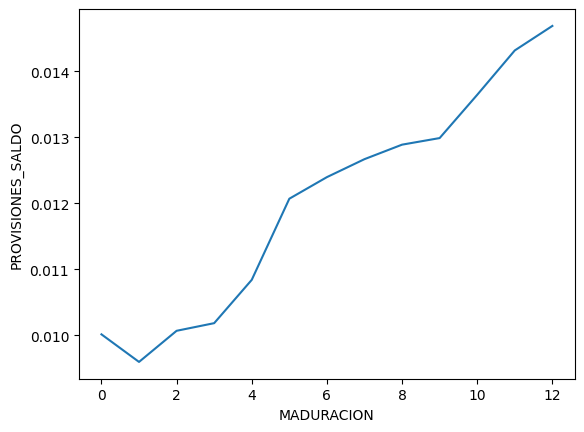

In [23]:
sns.lineplot(data = res, x = 'MADURACION', y = 'PROVISIONES_SALDO')

In [ ]:
# Cuentas en maduración 0
pddf.loc[pddf.MADURACION == 0]['MTOPRINCIPALSOL'].count()

In [11]:
# Saldo en maduración 0
pddf.loc[pddf.MADURACION == 0]['MTOPRINCIPALSOL'].sum()

375650945.40876

In [ ]:
# Suma del gasto
pddf['MTOGASTOPROVISIONSOL'].sum()

In [78]:
# Provisiones entre Saldo 12 meses
res['prov_saldo_12'] =  res.MTOGASTOPROVISIONSOL/pddf.loc[pddf.MADURACION == 0]['MTOPRINCIPALSOL'].sum()

In [ ]:
# Provisiones por maduración
res = pddf.groupby('MADURACION').aggregate({'MTOGASTOPROVISIONSOL': 'sum'}).reset_index()
res

In [ ]:
# Acumulación de provisiones
res['Acumulacion_prov'] = res.MTOGASTOPROVISIONSOL.cumsum()
res

In [ ]:
sns.lineplot(data = res, x = 'MADURACION', y = 'Acumulacion_prov')

### Definición de Pauta por provisiones

In [29]:
pddf_sec = pddf[pddf.MADURACION == 0][['ID', 'MES_COSECHA', 'NUMENTIDADES_6']].drop_duplicates().rename(columns = {'NUMENTIDADES_6' : 'ENTIDADES_ORIG'})


In [32]:
pddf_f = pd.merge(pddf, pddf_sec, on = ['ID', 'MES_COSECHA'], how = 'left')

In [33]:
res = pddf_f.groupby('ENTIDADES_ORIG').aggregate({'MTOGASTOPROVISIONSOL': 'sum'}).reset_index()
res

,ENTIDADES_ORIG,MTOGASTOPROVISIONSOL
0,1.0,2.266643e+06
1,2.0,1.883357e+06
2,3.0,8.542300e+05
3,4.0,1.990035e+05
4,5.0,1.641963e+05
5,6.0,4.708164e+03
6,7.0,2.926852e+04
7,8.0,1.147237e+05


In [36]:
temp = pddf_f.loc[pddf_f.MADURACION == 0].groupby('ENTIDADES_ORIG').aggregate({'ID': 'count',
                                                                           'MTOPRINCIPALSOL': 'sum'}).reset_index()
temp.head(12)

,ENTIDADES_ORIG,ID,MTOPRINCIPALSOL
0,1.0,1721,1.589638e+08
1,2.0,1204,1.349007e+08
2,3.0,461,5.669896e+07
3,4.0,149,1.626739e+07
4,5.0,37,7.650265e+06
5,6.0,6,6.486118e+05
6,7.0,2,3.300003e+05
7,8.0,1,1.912063e+05


In [38]:
dfRes = pd.merge(res, temp, on = 'ENTIDADES_ORIG', how = 'left')
dfRes.head(14)

,ENTIDADES_ORIG,MTOGASTOPROVISIONSOL,ID,MTOPRINCIPALSOL
0,1.0,2.266643e+06,1721,1.589638e+08
1,2.0,1.883357e+06,1204,1.349007e+08
2,3.0,8.542300e+05,461,5.669896e+07
3,4.0,1.990035e+05,149,1.626739e+07
4,5.0,1.641963e+05,37,7.650265e+06
5,6.0,4.708164e+03,6,6.486118e+05
6,7.0,2.926852e+04,2,3.300003e+05
7,8.0,1.147237e+05,1,1.912063e+05


In [39]:
dfRes['prov_saldo_12'] = dfRes.MTOGASTOPROVISIONSOL/dfRes.MTOPRINCIPALSOL
dfRes.head(14)

,ENTIDADES_ORIG,MTOGASTOPROVISIONSOL,ID,MTOPRINCIPALSOL,prov_saldo_12
0,1.0,2.266643e+06,1721,1.589638e+08,0.014259
1,2.0,1.883357e+06,1204,1.349007e+08,0.013961
2,3.0,8.542300e+05,461,5.669896e+07,0.015066
3,4.0,1.990035e+05,149,1.626739e+07,0.012233
4,5.0,1.641963e+05,37,7.650265e+06,0.021463
5,6.0,4.708164e+03,6,6.486118e+05,0.007259
6,7.0,2.926852e+04,2,3.300003e+05,0.088692
7,8.0,1.147237e+05,1,1.912063e+05,0.600000


<Axes: xlabel='ENTIDADES_ORIG', ylabel='prov_saldo_12'>

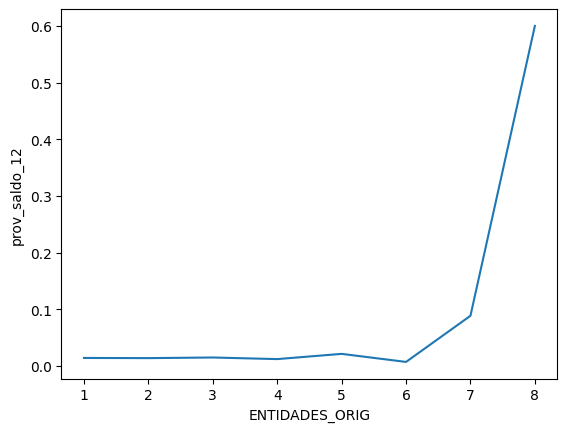

In [40]:

sns.lineplot(data = dfRes, x = 'ENTIDADES_ORIG', y = 'prov_saldo_12')


---
## Gracias por completar este laboratorio!